In [94]:
import numpy as np
import pandas as pd

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
#read csv file containing data on 911 calls into a dataframe
df = pd.read_csv('911.csv')

In [97]:
#output column types in df dataframe
#lat/long -> latitude and longitude of where the call took place
#desc -> street or intersection of where call took place; township; station number; timestamp
#zip -> zip code of where the call took place
#title -> reason for the call
#timeStamp -> timestamp of call
#twp -> township
#addr -> address

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [98]:
#output the dataframe head
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [99]:
#find the 5 zip codes that the most 911 calls came from
top_five_zip = df.groupby('zip').count()['lat'].nlargest(5)
top_five_zip

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: lat, dtype: int64

In [100]:
#find the 5 townships where the most 911 calls came from
top_five_twp = df.groupby('twp').count()['lat'].nlargest(5)
top_five_twp

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: lat, dtype: int64

In [101]:
#count the number of unique title codes (unique number of reasons for calls)
unique_title_codes = len(df['title'].unique())
unique_title_codes

110

In [102]:
#create a new column in the data frame from the title column for the general reason for the call: EMS/Fire/Traffic
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [103]:
#rank the 3 911 phone call reasons
top_reasons = df.groupby('reason').count()['lat'].sort_values(ascending=False)
top_reasons

reason
EMS        48877
Traffic    35695
Fire       14920
Name: lat, dtype: int64

In [104]:
import seaborn as sns
%matplotlib inline

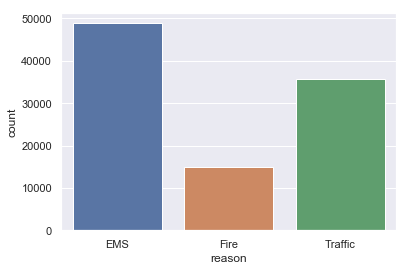

In [105]:
#create a countplot for the different reasons of 911 calls
sns.countplot(df['reason'])

In [106]:
#output timeStamp column type
type(df['timeStamp'][0])

str

In [107]:
#change timeStamp column type to datetime
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [108]:
#check data type again to ensure it is datetime
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [109]:
#create a dictionary to map days of the week to their corresponding names
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [110]:
#create a dayName column by applying a lambda function to the timeStamp column
df['day of week'] = df['timeStamp'].apply(lambda timeStamp: timeStamp.dayofweek)

In [111]:
#map the elements in the dayName column to their corresponding day of week names using dmap
df['day of week'] = df['day of week'].map(dmap)

In [112]:
#output the dataframe head to verify successfully done
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thu


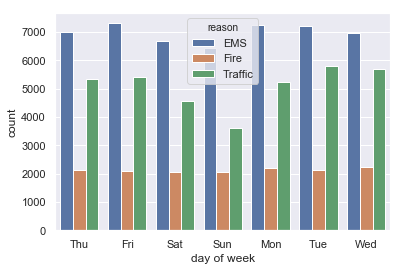

In [113]:
#create a countplot to show the frequency of calls for varying days of the week
#additionally, show the number of phone calls received for varying reasons
sns.countplot(df['day of week'], hue=df['reason'])

In [114]:
#create a month column from the timeStamp column
df['month'] = df['timeStamp'].apply(lambda timeStamp: timeStamp.month)

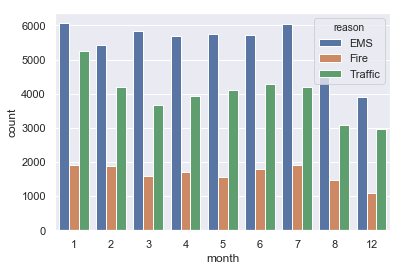

In [115]:
#plot the number of phone calls received for varying reasons by month
#note that months 9, 10, and 11 are missing
sns.set(style='darkgrid')
sns.countplot(df['month'], hue=df['reason'])

In [116]:
#output a count of the number of calls received for each month recorded
byMonth = df.groupby('month').count()
byMonth['lat']

month
1     13205
2     11467
3     11101
4     11326
5     11423
6     11786
7     12137
8      9078
12     7969
Name: lat, dtype: int64

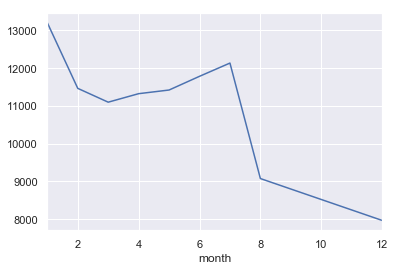

In [117]:
#create a continuous xy plot that counts the number of calls for each month
#months 9,10,11 are approximated by a line connecting months 8 and 12
byMonth['lat'].plot()

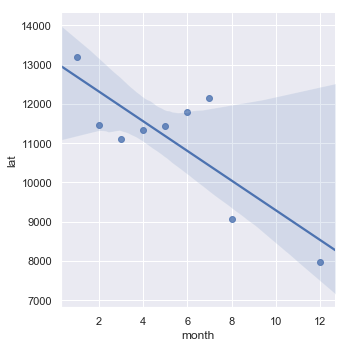

In [118]:
#create a linear regression plot along with its confidence interval 
#to show the expected number of calls for a given month
sns.lmplot(x='month',y='lat',data=byMonth.reset_index())

In [119]:
#create a new column called 'Date' that contains the date from the timeStamp column
df['date'] = df['timeStamp'].apply(lambda t: t.date())

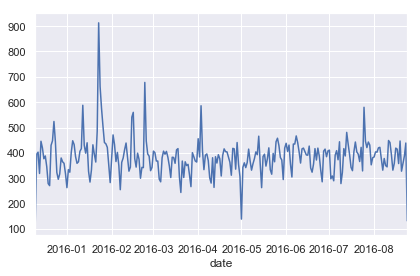

In [120]:
#groupby this new date column with the count() aggregate function and create a plot of counts of 911 calls
df.groupby('date').count()['twp'].plot()
plt.tight_layout()

In [121]:
#recreate the previous plot but now for each of the 3 varying reasons

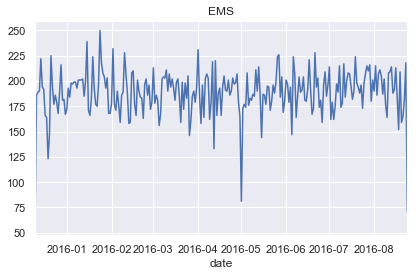

In [122]:
#EMS
df[df['reason']=='EMS'].groupby('date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

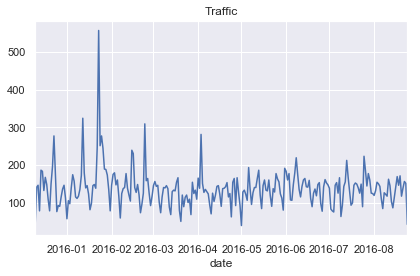

In [123]:
#Traffic
df[df['reason']=='Traffic'].groupby('date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

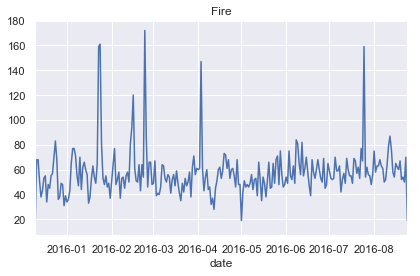

In [124]:
df[df['reason']=='Fire'].groupby('date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

In [125]:
#Restructure the dataframe so that columns become the hour in the day of phone call
#and day of week becomes the rows

#create hour column first
df['hour'] = df['timeStamp'].apply(lambda timeStamp: timeStamp.hour)

#create table containing number of calls per hour for each day of the week
dayHour = df.groupby(by=['day of week','hour']).count()['reason'].unstack()
dayHour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


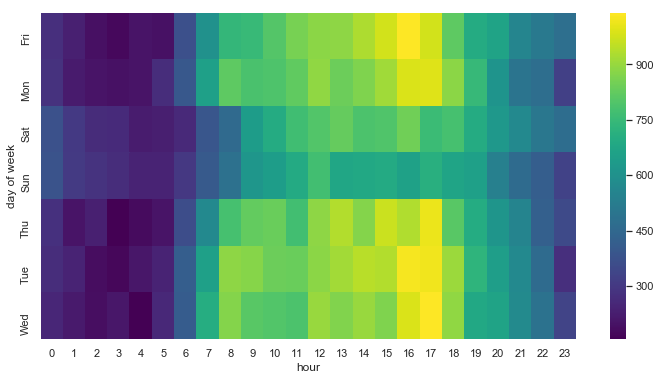

In [126]:
#create a heatmap of the dayHour dataframe
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

In [127]:
#now create the same dataframe with month as the columns
dayMonth = df.groupby(by=['day of week','month']).count()['reason'].unstack()
dayMonth

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


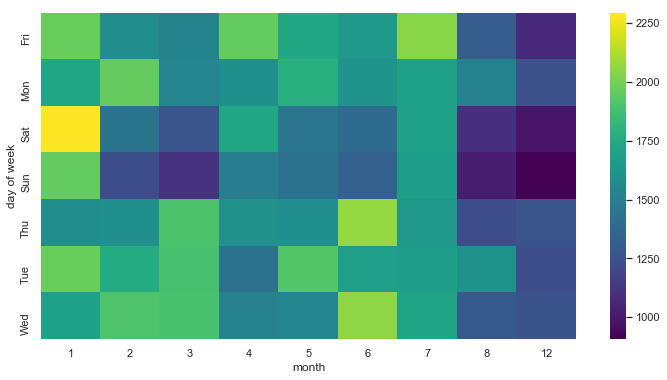

In [128]:
#create and plot the corresponding heatmap with day of week as the rows
#and month the call took place as the columns
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')